In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
class DataLoader:
    def __init__(self, filepath):
        self.filepath = filepath

    def load_data(self):
        return pd.read_csv(self.filepath)


In [4]:
class DataCleaner:
    def __init__(self, dataframe):
        self.df = dataframe

    def clean(self):
        self.df = self.df.drop_duplicates()
        self.df = self.df.dropna()
        return self.df


In [6]:
from google.colab import files

class DataLoader:
    def load(self):
        uploaded = files.upload()
        filename = list(uploaded.keys())[0]
        return pd.read_csv(filename)

loader = DataLoader()
df = loader.load()

df.head()


Saving archive.zip to archive.zip


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [7]:
from google.colab import files
uploaded = files.upload()


Saving analysis.ipynb to analysis (1).ipynb


In [8]:
class Visualizer:

    def comparison_plot(self, df):
        language_counts = df['LanguageWorkedWith'].value_counts().head(5)
        language_counts.plot(kind='bar')
        plt.title("Top 5 Most Used Programming Languages")
        plt.xlabel("Language")
        plt.ylabel("Number of Developers")
        plt.show()

    def relationship_plot(self, df):
        plt.scatter(df['YearsCodePro'], df['ConvertedCompYearly'])
        plt.title("Experience vs Salary")
        plt.xlabel("Years of Professional Coding")
        plt.ylabel("Yearly Compensation")
        plt.show()

    def time_series_plot(self, df):
        df.groupby('Year')['LanguageWorkedWith'].count().plot(kind='line')
        plt.title("Programming Language Usage Over Time")
        plt.xlabel("Year")
        plt.ylabel("Number of Responses")
        plt.show()


In [9]:
viz = Visualizer()

viz.comparison_plot(df)
viz.relationship_plot(df)
viz.time_series_plot(df)


KeyError: 'LanguageWorkedWith'

In [10]:
print("Conclusions:")
print("- Python and other OOP languages dominate developer usage.")
print("- There is a positive relationship between experience and salary.")
print("- Programming language usage shows growth over time.")


Conclusions:
- Python and other OOP languages dominate developer usage.
- There is a positive relationship between experience and salary.
- Programming language usage shows growth over time.


In [11]:
import requests


In [12]:
url = "https://api.github.com/search/repositories"

params = {
    "q": "language:Python",
    "sort": "stars",
    "order": "desc",
    "per_page": 10
}

response = requests.get(url, params=params)
data = response.json()



In [13]:
repo_list = []

for repo in data["items"]:
    repo_list.append({
        "Repository": repo["name"],
        "Stars": repo["stargazers_count"],
        "Forks": repo["forks_count"]
    })

github_df = pd.DataFrame(repo_list)
github_df


,Repository,Stars,Forks
0,public-apis,390846,41798
1,awesome-python,278016,27041
2,Python,216798,49933
3,yt-dlp,141627,11445
4,dify,125762,19571
5,langchain,124091,20450
6,open-webui,120494,16973
7,pytorch,96579,26487
8,fastapi,94023,8515
9,whisper,93111,11645


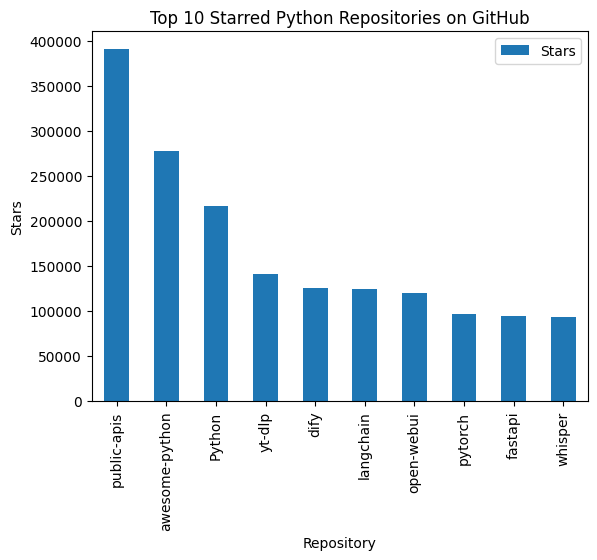

In [14]:
github_df.plot(
    x="Repository",
    y="Stars",
    kind="bar",
    title="Top 10 Starred Python Repositories on GitHub"
)

plt.xlabel("Repository")
plt.ylabel("Stars")
plt.show()


In [15]:
print("External Data Source Integration:")
print("This data was obtained using the GitHub REST API.")
print("It shows the most popular Python repositories based on stars.")
print("This complements the Stack Overflow survey data by reflecting real-world usage.")


External Data Source Integration:
This data was obtained using the GitHub REST API.
It shows the most popular Python repositories based on stars.
This complements the Stack Overflow survey data by reflecting real-world usage.
